In [1]:
import pandas as pd
it_df = pd.read_csv('0814_word_embedding_it.csv').dropna() # 디폴트로 NaN이 1개라도 포함되면 해당 행이 삭제
culture_df = pd.read_csv('0814_word_embedding_culture.csv').dropna()

In [2]:
it_token_ls = list(it_df.loc[:,'1'])
culture_token_ls = list(culture_df.loc[:,'1'])
total_token_ls = it_token_ls + culture_token_ls

In [3]:
total_token_ls[0]

'배,정회,신임,과학기술,일자리,진흥,원장,아시아,경제,이민,우,배,정회,전,국립,중앙,과학,관,전시,연구,단장,과학기술,일자리,진흥,제,원장,취임,과학기술,정보,통신,같은,인사,발표,임기,날,동안,배,신임,원장,행정,고등고시,공직,입문,교육,과학기술,부,융합,기술,과장,중앙대,경영,경제,초빙교수,과기,정통부,연구,성과,활용,정책,과장,연구,성과,혁신,기획,과장,과학기술,정책,수립,정부,연구개발,연구,기술,이전,사업,두루,경험,보유,평가,배,신임,원장,날,환담,회,새로운,임무,조직,신속히,성하고,직원,역량,강화하겠다,며,실험실,유망,기술,전,문,기업,연결하며,기술,이전,효과,지원,신,기술,창업,통한,미래,일자리,많이,창,고,이민,우,네이버,홈,아시아,경제,뉴스,확인,재미,신기,과학,꿀,잼,인,기,만화,경제,눈,세계,창,아시아,경제,전,재'

In [4]:
total_token_ls = [tokens.split(',') for tokens in total_token_ls]

In [5]:
total_token_ls[0][:10]

['배', '정회', '신임', '과학기술', '일자리', '진흥', '원장', '아시아', '경제', '이민']

In [6]:
!pip install paramiko
from gensim.models import Word2Vec

In [7]:
word2vec = Word2Vec(
    sentences = total_token_ls,  # 학습시킬 문장
    size = 30,                  # 임베딩된 단어 벡터의 차원 크기
    alpha = 0.025,               # 학습률(Learning rate)
    min_count=2,                 # 2번 미만 등장한 단어는 제외
    window = 8,                  # 문맥의 크기 (window_size)
    sample = 0.001,              # sub-sampling
    sg = 1,                      # 0: CBOW, 1: Skip-gram
    iter = 10                    # 전체 문장 반복학습 횟수(epoch)
    )

In [8]:
word2vec.wv.__getitem__('문화')

array([ 4.2288953e-01,  4.0146983e-01, -4.0052977e-01,  1.2736255e-01,
       -4.4018579e-01,  9.4092762e-01, -7.2334212e-01, -1.1692129e+00,
       -3.7431300e-01, -7.3852208e-03,  1.9926208e-01, -4.5931470e-01,
        4.2394501e-01, -8.7938941e-01, -1.0421786e+00,  3.1717744e-01,
        1.0595020e+00,  3.3912161e-01, -2.5301686e-02, -2.0295380e-01,
        1.1961545e-01,  1.3557595e-01,  3.7944466e-01,  5.7017720e-01,
        1.3474359e-01,  2.3387042e-01, -6.0534477e-04,  3.0984730e-01,
        1.9208901e-01,  1.2910138e+00], dtype=float32)

In [9]:
word2vec.wv.most_similar('인공')

[('지능', 0.9600118398666382),
 ('학습', 0.8727588653564453),
 ('결합', 0.8609855771064758),
 ('프로젝트', 0.8351868987083435),
 ('블록', 0.8316760659217834),
 ('유전자', 0.827271044254303),
 ('의료', 0.8243082165718079),
 ('커뮤니티', 0.8206310272216797),
 ('정확성', 0.8197436332702637),
 ('높아', 0.8150026798248291)]

In [10]:
word2vec.wv.most_similar('공연')

[('회관', 0.9284383654594421),
 ('국악', 0.9230795502662659),
 ('관현악단', 0.9137392640113831),
 ('극장', 0.9126248359680176),
 ('기원', 0.9087554216384888),
 ('예술', 0.904289186000824),
 ('그림', 0.9032298922538757),
 ('연주', 0.8912868499755859),
 ('사물놀이', 0.8828365802764893),
 ('평양', 0.8733419179916382)]

# 차원축소 활용 시각화

In [12]:
similar_words = {search_term: [item[0] for item in word2vec.wv.most_similar([search_term], topn=20)]
                  for search_term in ['문화','인공','공연']}
similar_words

{'문화': ['체육',
  '대학교',
  '홍보',
  '회관',
  '평화',
  '확산',
  '교류',
  '예술',
  '우영',
  '겸',
  '한류',
  '정원',
  '문화유산',
  '정규',
  '핵',
  '경호',
  '이미지',
  '요인',
  '북한',
  '남북'],
 '인공': ['지능',
  '학습',
  '결합',
  '프로젝트',
  '블록',
  '유전자',
  '의료',
  '커뮤니티',
  '정확성',
  '높아',
  '체인',
  '접목',
  '필수',
  '러닝',
  '핀란드',
  '에너지',
  '증강현실',
  '지향',
  '친환경',
  '처방전'],
 '공연': ['회관',
  '국악',
  '관현악단',
  '극장',
  '기원',
  '예술',
  '그림',
  '연주',
  '사물놀이',
  '평양',
  '베토벤',
  '클래식',
  '신명',
  '남',
  '영화인',
  '겸',
  '초청',
  '단',
  '특별',
  '매력']}

In [18]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 기본 글꼴 변경
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.font_manager._rebuild()

C:\Users\15Z970-GA5BK\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


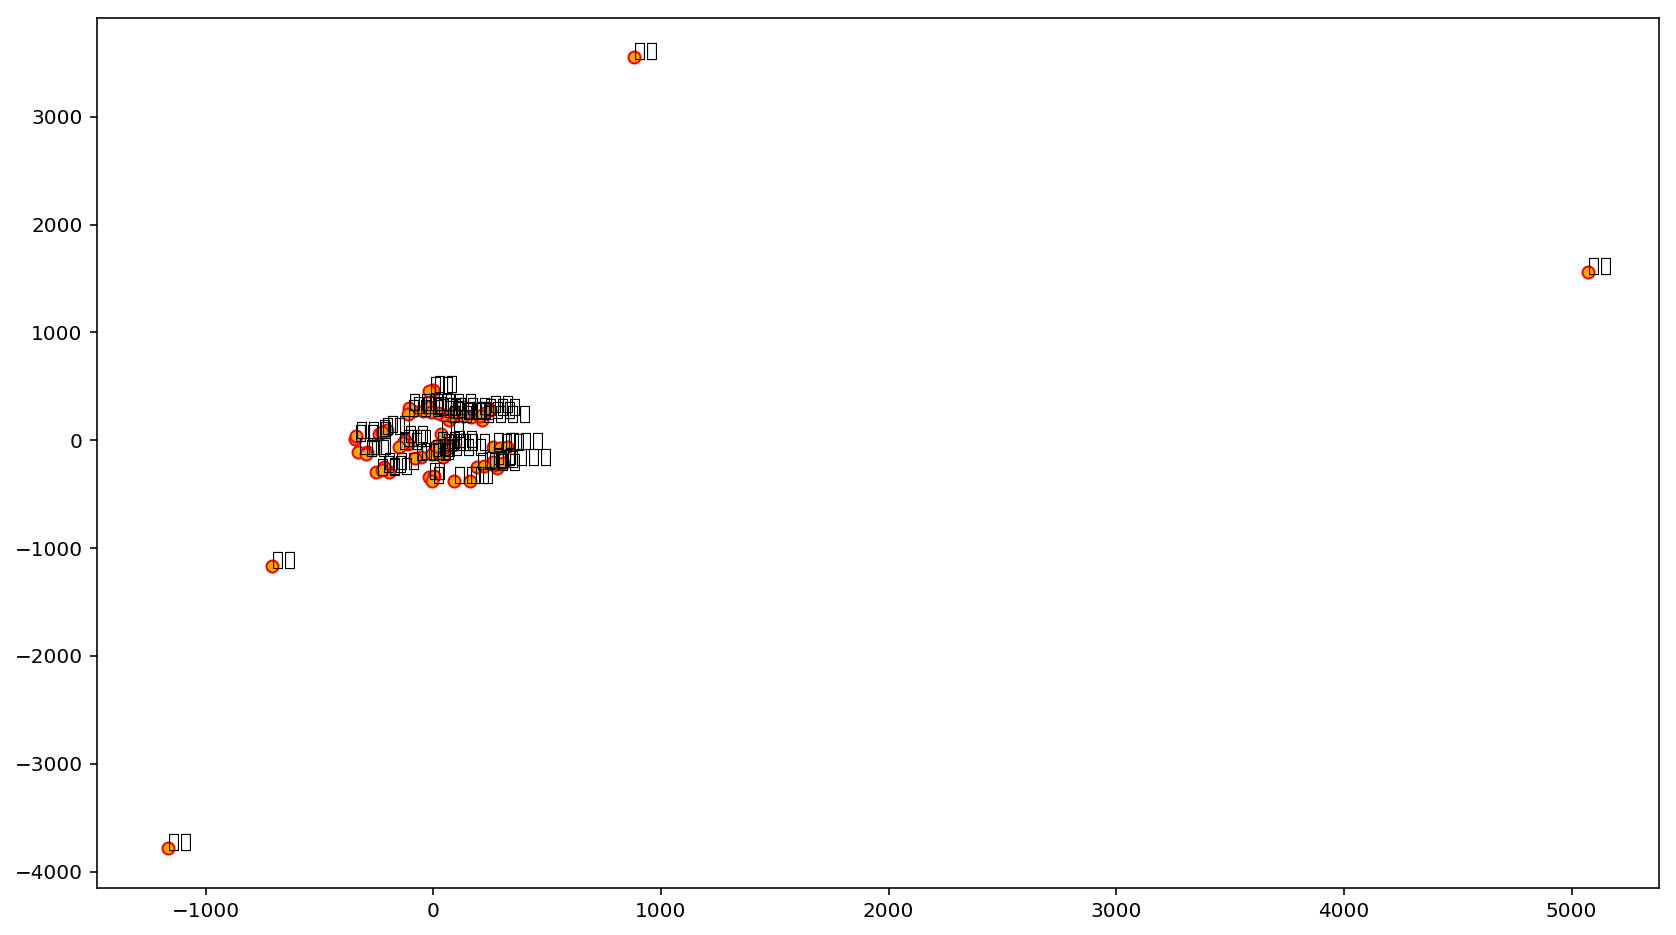

In [19]:
from sklearn.manifold import TSNE
import numpy as np

words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = word2vec.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')